<a href="https://colab.research.google.com/github/NopalChoir/datamining/blob/main/Tugas6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel("./dataset dailycap Ethereum.xlsx")

In [3]:
X = data[['Open','High','Low','Close','Volume']]
y = data['Adj Close']

In [4]:
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


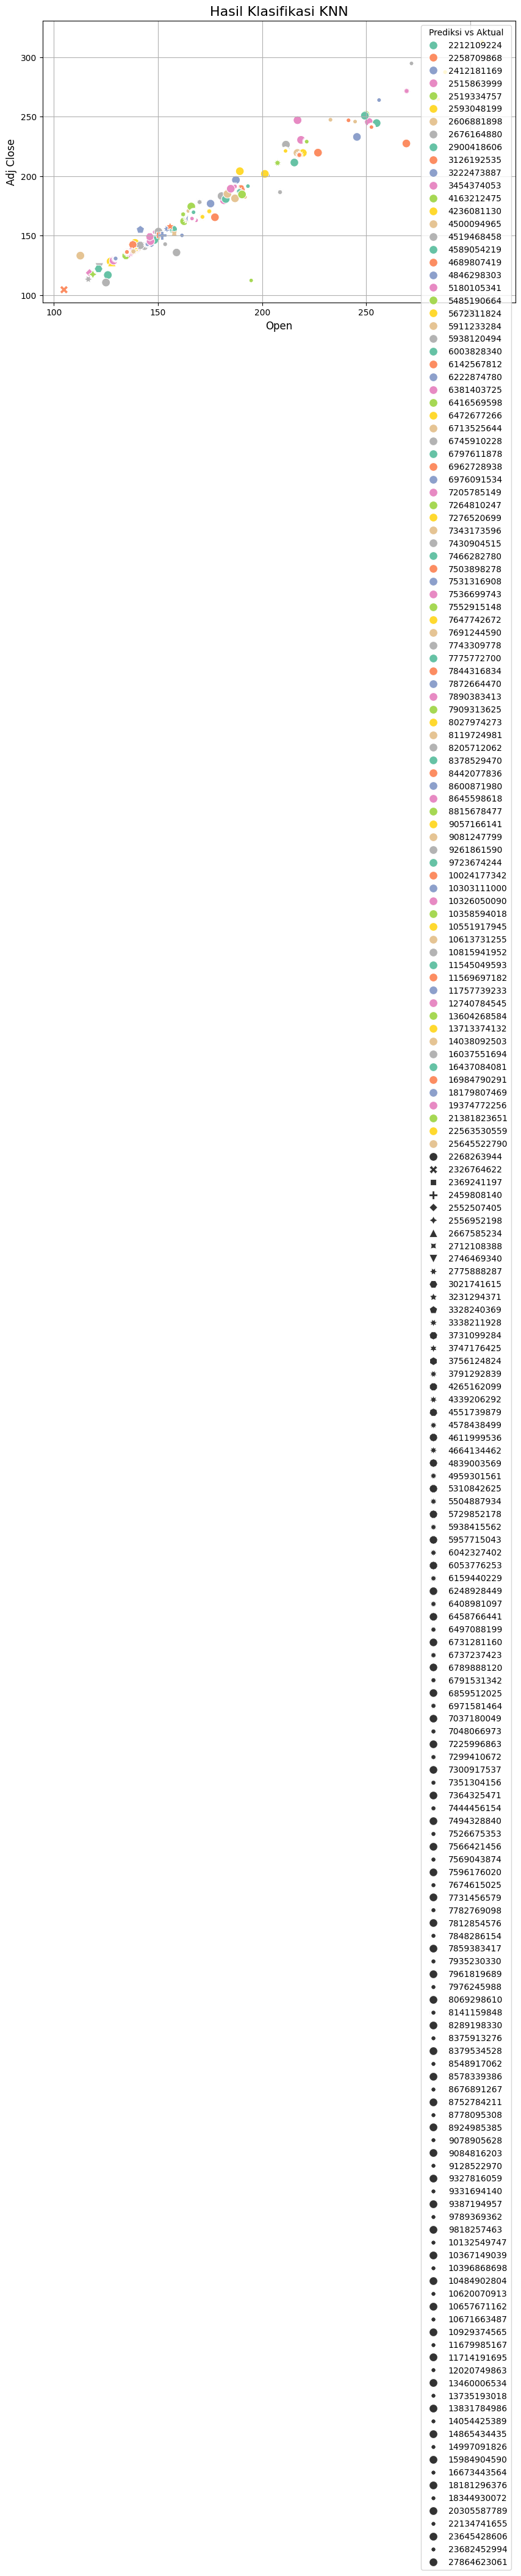

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Open'], y=X_test['Close'], hue=y_pred, style=y_test, s=100, palette='Set2')
plt.title('Hasil Klasifikasi KNN', fontsize=16)
plt.xlabel('Open', fontsize=12)
plt.ylabel('Adj Close', fontsize=12)
plt.legend(title='Prediksi vs Aktual', fontsize=10)
plt.grid(True)
plt.show()

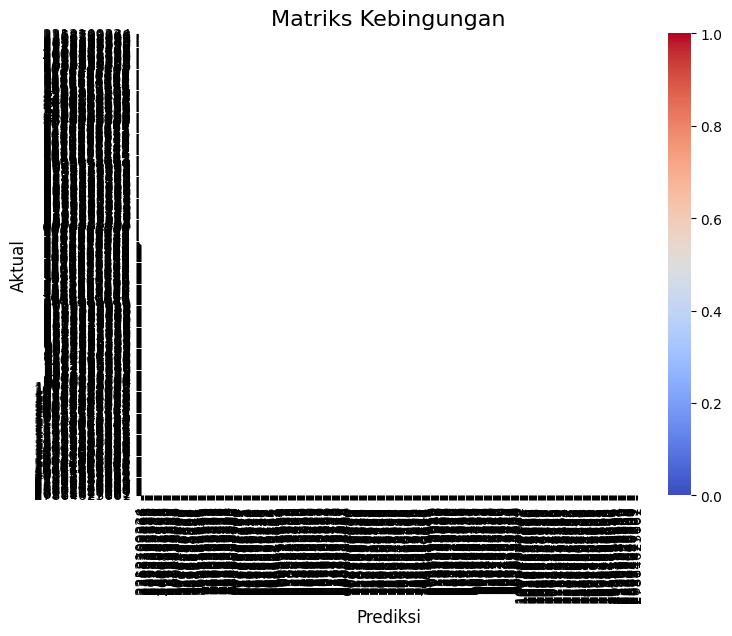

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', linewidths=.5, linecolor='black',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Matriks Kebingungan', fontsize=16)
plt.xlabel('Prediksi', fontsize=12)
plt.ylabel('Aktual', fontsize=12)
plt.show()